<a href="https://colab.research.google.com/github/KanishkaKelkar/ML-Prediction/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

***Feature description***:

**price**:- price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

**carat** (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

**cut** (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

**color** :- from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

**clarity** :-(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**X Y Z are the dimensions of the Diamond** :-
1. x length in mm (0--10.74)
2. y width in mm (0--58.9)
3. z depth in mm (0--31.8)

**Depth** :- The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**Table** :- A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye

In [2]:
#Load Datasets
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


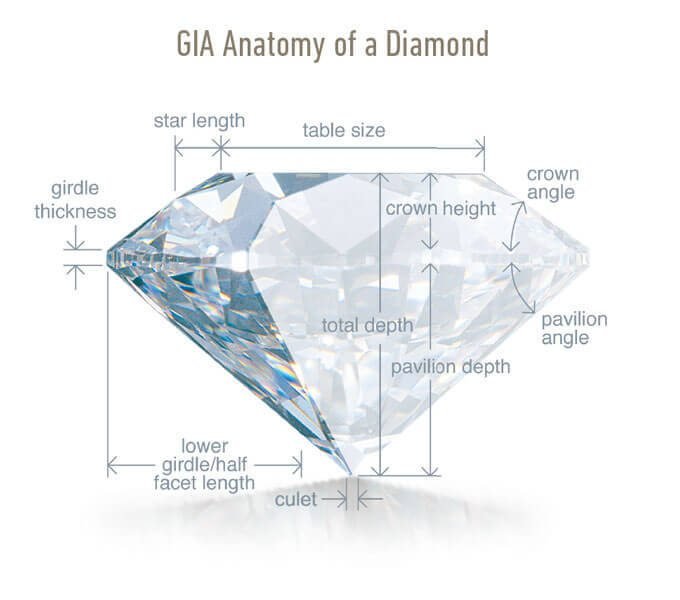

In [ ]:
from IPython.display import Image
url='https://yourdiamondteacher.com/wp-content/uploads/2015/04/GIA-diamond-proportions.jpg'
Image(url,width=500, height=500)

  Now let’s move on to the next step which is EDA & Data processing.

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

We can observe that there is no null value

In [3]:
# Drop the least important column
df.drop("Unnamed: 0", inplace=True, axis=1)

In [ ]:
#Descriptive Statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Shape
df.shape

(53940, 10)


*   Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds.
*   So we need to filter out those as it clearly faulty data points.


In [4]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

df.shape

(17849, 10)

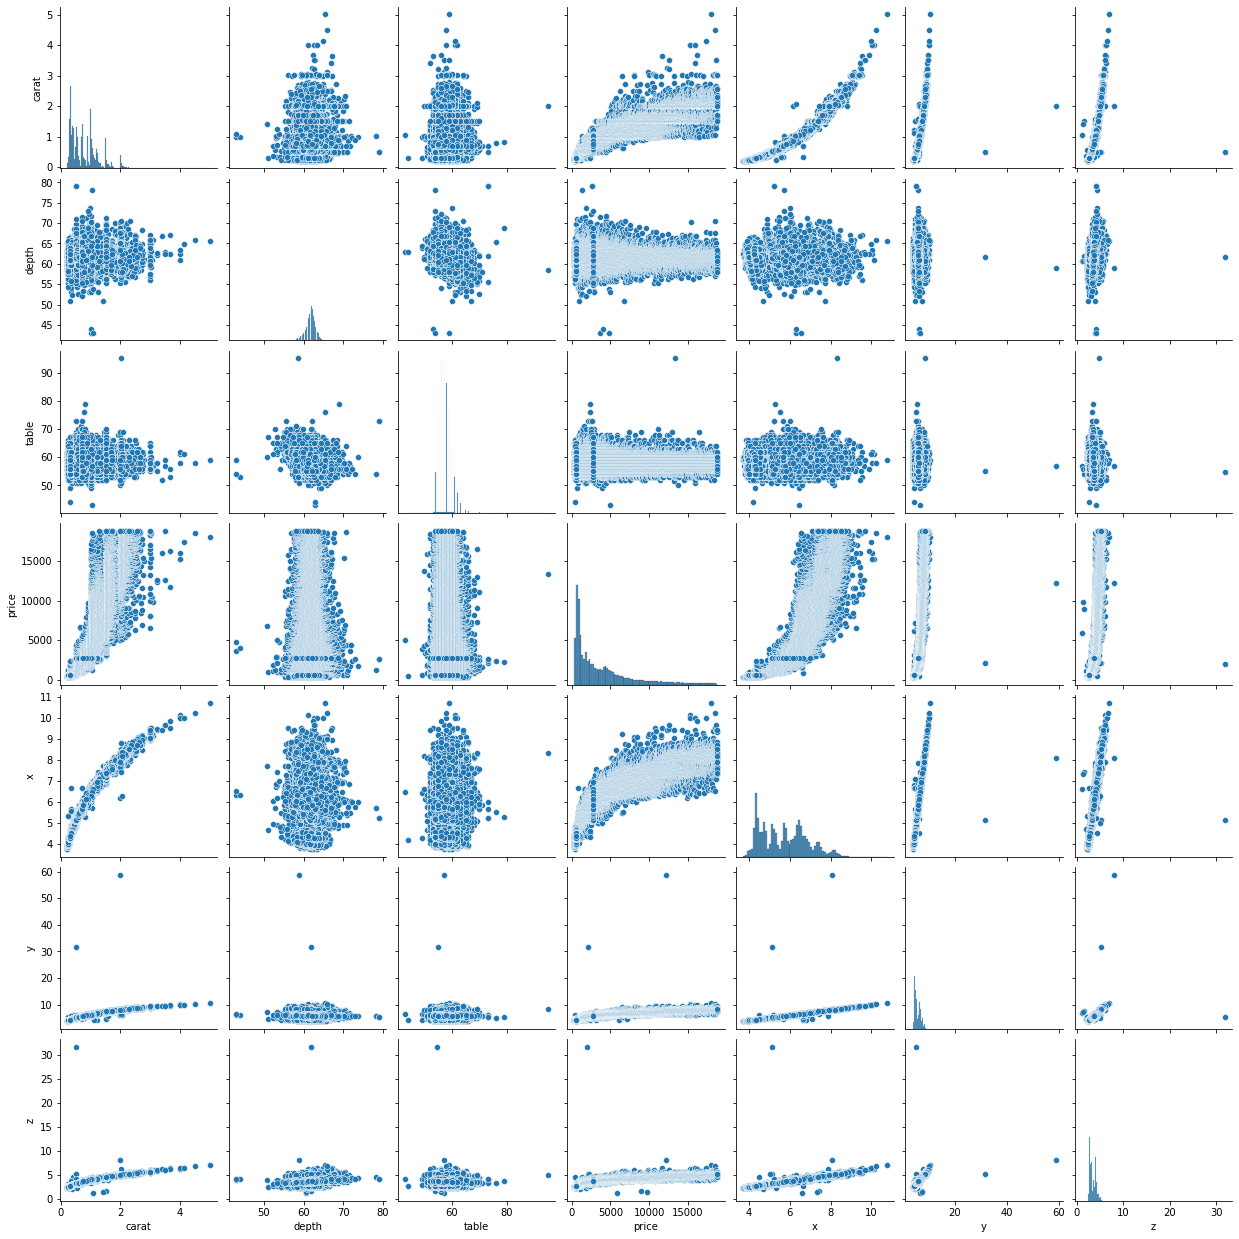

In [ ]:
# Pairplot
sns.pairplot(df)

Analysis in these pair plots :-


1.   There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.
2.   "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.

3.   The "depth" should be capped but we must examine the regression line to be sure.
4.  The "table" featured should be capped too.


Let's have a look at regression plots to get a close look at the outliers.


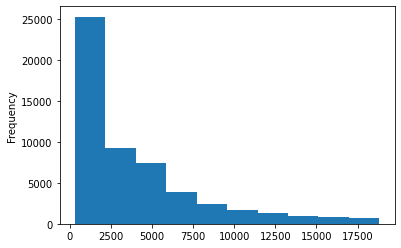

In [ ]:
# Visualisation
df.price.plot(kind="hist")

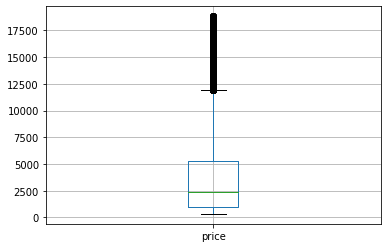

In [ ]:
df.boxplot('price')

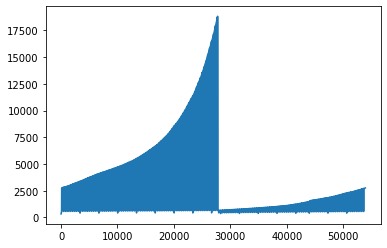

In [ ]:
df.price.plot()

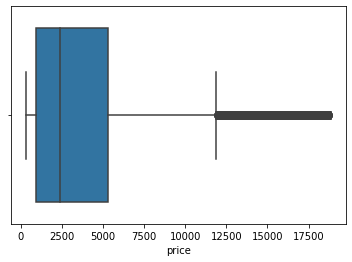

In [ ]:
# Handling Outliers
sns.boxplot(df['price'])

Analysis of price with Dimension :-

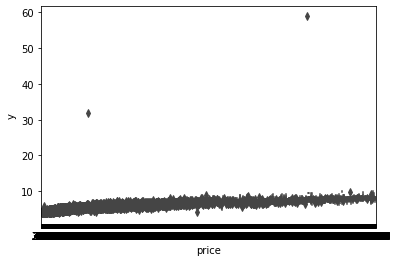

In [ ]:
# Price w.r.t y
sns.boxplot(data=df, x='price', y='y')

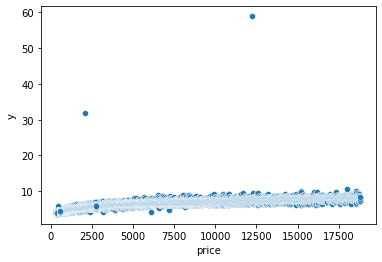

In [ ]:
sns.scatterplot(data=df, x="price", y="y")
plt.show()

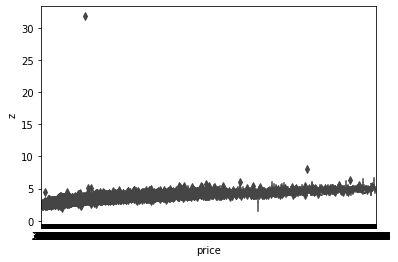

In [ ]:
# Price w.r.t z
sns.boxplot(data=df, x='price', y='z')

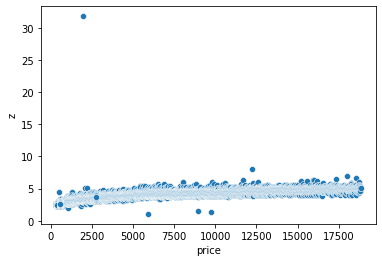

In [ ]:
sns.scatterplot(data=df, x="price", y="z")
plt.show()

Analysis with Depth :-

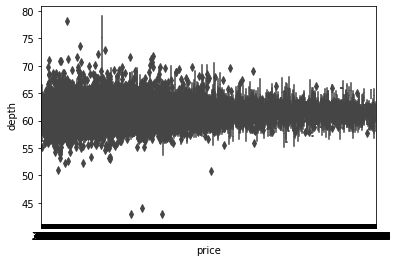

In [ ]:
# Price w.r.t depth
sns.boxplot(data=df, x='price', y='depth')

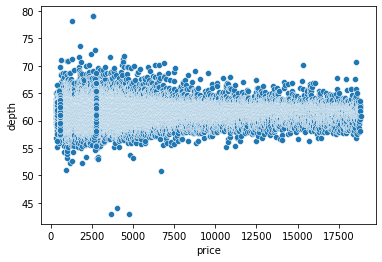

In [ ]:
sns.scatterplot(data=df, x="price", y="depth")
plt.show()

Analysis with Table :-

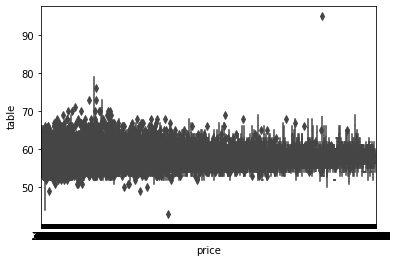

In [ ]:
# Price w.r.t table
sns.boxplot(data=df, x='price', y='table')

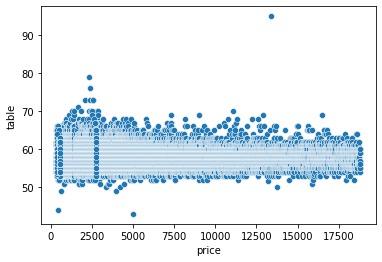

In [ ]:
sns.scatterplot(data=df, x="price", y="table")
plt.show()

From Above Graphs we can observe some outliers, so we will drop the outliers for better model performance

In [5]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]

df = df[(df["table"]<80)&(df["table"]>40)]

df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

df.shape

(17844, 10)

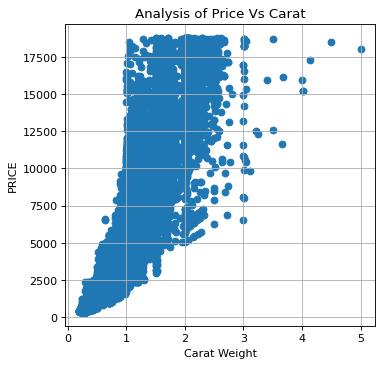

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(5,5), dpi=80)
plt.scatter(df['carat'],df['price'])
plt.title("Analysis of Price Vs Carat")
plt.ylabel('PRICE')
plt.xlabel('Carat Weight')
plt.grid(True)
plt.show()

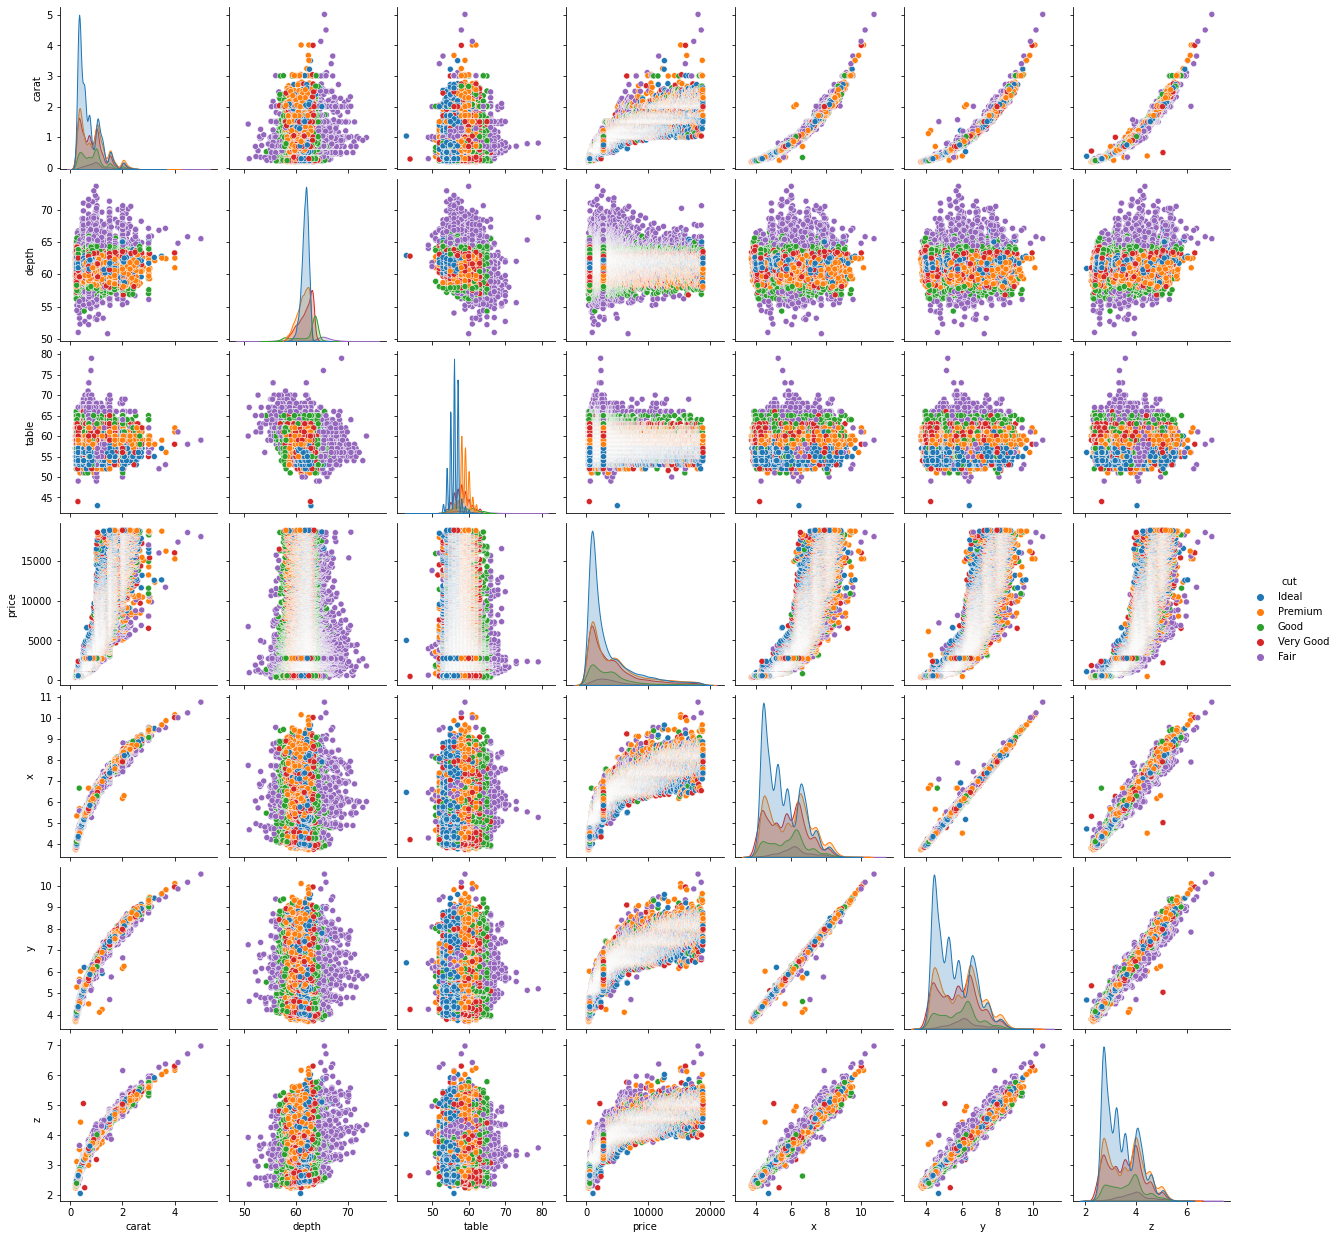

In [ ]:
# Visualisation for Categorial data
sns.pairplot(data = df, hue= "cut")

Violinplot for understanding distribution of categorical Data :-

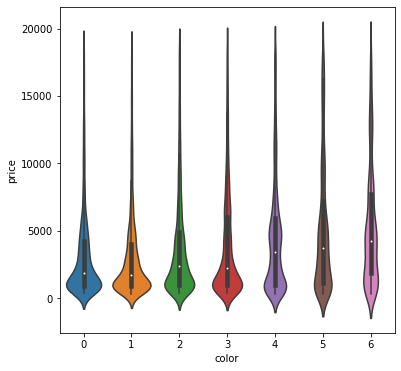

In [ ]:
plt.figure(figsize = (6,6))
sns.violinplot(x='color',y='price',data=df)

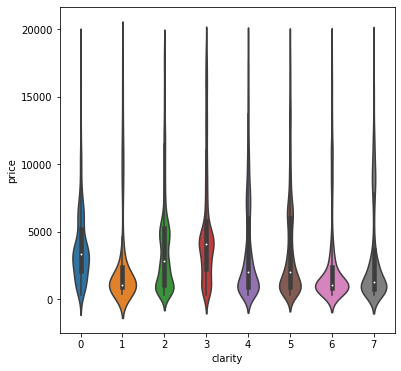

In [ ]:
plt.figure(figsize = (6,6))
sns.violinplot(x='clarity',y='price',data=df)

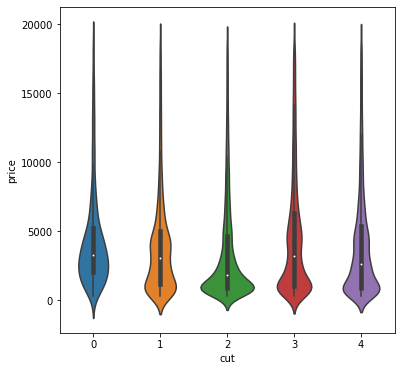

In [ ]:
plt.figure(figsize = (6,6))
sns.violinplot(x='cut',y='price',data=df)

Countplot to Show the counts of observations in each categorical bin using bars :-

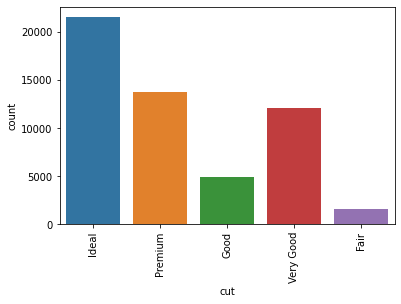

In [ ]:
sns.countplot(data=df, x="cut")
plt.xticks(rotation=90)
plt.show()

#The ideal table cut diamond will give the diamond stunning fire and brilliance.

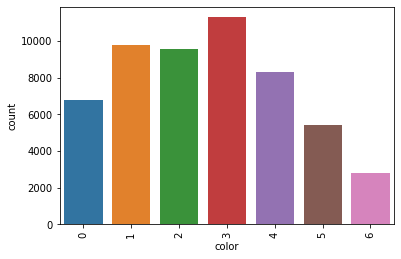

In [ ]:
sns.countplot(data=df, x="color")
plt.xticks(rotation=90)
plt.show()

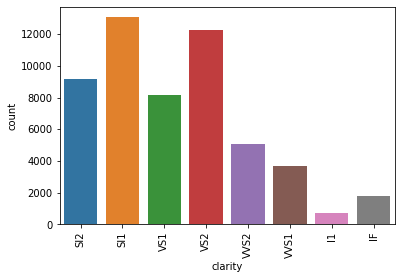

In [ ]:
sns.countplot(data=df, x="clarity")
plt.xticks(rotation=90)
plt.show()

Corelation :-

In [ ]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037
depth,0.029267,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525
table,0.181797,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670
price,0.921590,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634
x,0.977777,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665
y,0.976860,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327
z,0.977037,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000


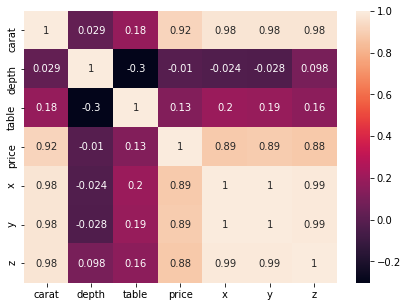

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

Analysis of corelation :-

1.   "x", "y" and "z" show a high correlation to the target column.
2.   "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

In [ ]:
df.corr()['price'].sort_values()

depth   -0.010287
table    0.127108
z        0.882634
x        0.887212
y        0.888807
carat    0.921590
price    1.000000
Name: price, dtype: float64

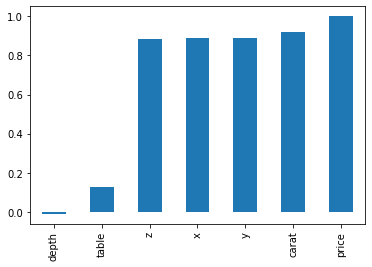

In [ ]:
df.corr()['price'].sort_values().plot(kind="bar")

Encoding Categorial Data

In [6]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [7]:
df_cat 

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
17852,Very Good,H,SI1
17853,Ideal,G,VS2
17854,Premium,J,VS2
17855,Premium,G,VS2


In [8]:
df_num

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
17852,1.21,59.6,60.0,7203,6.93,6.94,4.13
17853,1.16,62.3,57.0,7203,6.72,6.66,4.17
17854,1.47,61.5,58.0,7203,7.31,7.29,4.49
17855,1.16,59.9,60.0,7203,6.88,6.85,4.11


In [9]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [10]:
df_cat

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
17852,4,4,2
17853,2,3,5
17854,3,6,5
17855,3,3,5


In [11]:
df = pd.concat([df_cat, df_num], axis=1)

In [12]:
df

,cut,color,clarity,carat,depth,table,price,x,y,z
0,2,1,3,0.23,61.5,55.0,326,3.95,3.98,2.43
1,3,1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,1,1,4,0.23,56.9,65.0,327,4.05,4.07,2.31
3,3,5,5,0.29,62.4,58.0,334,4.20,4.23,2.63
4,1,6,3,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
17852,4,4,2,1.21,59.6,60.0,7203,6.93,6.94,4.13
17853,2,3,5,1.16,62.3,57.0,7203,6.72,6.66,4.17
17854,3,6,5,1.47,61.5,58.0,7203,7.31,7.29,4.49
17855,3,3,5,1.16,59.9,60.0,7203,6.88,6.85,4.11


**Model Creation**

In [13]:
# Divide X & Y
x = df.drop('price', axis=1)
y = df['price']


In [14]:
# Training Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score, mean_squared_error

In [16]:
def regression_report(ytest, ypred):
    print(f"MSE -: {mean_squared_error(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}")
    print(f"R-Squared -: {r2_score(ytest, ypred)*100}\n\n\n")

In [17]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    regression_report(ytest, ypred)

In [18]:
models = []

models.append(('Linear Regression:-    ', LinearRegression()))
models.append( ("RF     -:", RandomForestRegressor(min_samples_leaf=2)))
models.append( ("Decision Tree -:", DecisionTreeRegressor()) )
models.append(("XGBoost:-",XGBRegressor()))
models.append(("Gradient Boosting Regressor:-",GradientBoostingRegressor()))

for name, model in models:
    print(name)
    mymodel(model)

Linear Regression:-    
MSE -: 537788.3252881748
RMSE -: 733.3405247824334
R-Squared -: 80.40934918443494



RF     -:
MSE -: 153496.70923468377
RMSE -: 391.7865608142829
R-Squared -: 94.40839398969166



Decision Tree -:
MSE -: 287384.3126167352
RMSE -: 536.0823748424632
R-Squared -: 89.53111204984084



XGBoost:-
[11:16:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE -: 183143.33369022637
RMSE -: 427.9524899918522
R-Squared -: 93.32842136801472



Gradient Boosting Regressor:-
MSE -: 181843.96734773729
RMSE -: 426.4316678528194
R-Squared -: 93.37575492119954





**Hyperparameter** **tunning**

In [19]:
# Using Grid Search CV for parameter tunning
from sklearn.model_selection import GridSearchCV

GBR = GradientBoostingRegressor()

In [20]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(xtrain, ytrain)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [22]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.5}

 The best score across ALL searched params:
 0.9478319064577772


Visualisation of our Predicted Model :-

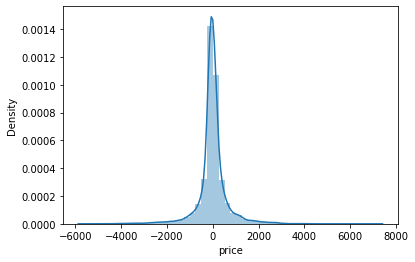

In [ ]:
sns.distplot((ytest-ypred), bins=50)

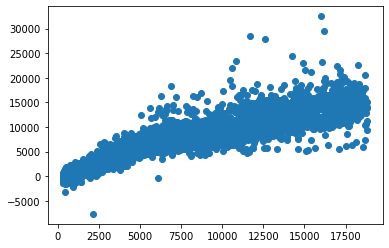

In [ ]:
plt.scatter(ytest, ypred)

In [ ]:
coef_df = pd.DataFrame(lr.coef_, x.columns, columns=["Coefficient"])
coef_df

,Coefficient
cut,52.504916
color,-270.319328
clarity,282.923290
carat,11385.057984
depth,148.696394
table,-89.167218
x,-1471.742635
y,3343.935884
z,-5119.418013


interpreting the coefficients-:

Holding all other features fixed, a 1 unit increase in Cut is associated with an increase of $ 52.504916.

Holding all other features fixed, a 1 unit increase in Color is associated with an decrease of $ 270.319328.

Holding all other features fixed, a 1 unit increase in Clarity of Rooms is associated with an increase of $ 282.923290.

Holding all other features fixed, a 1 unit increase in Carat of Bedrooms is associated with an increase of $ 11385.057984.

Holding all other features fixed, a 1 unit increase in Depth is associated with an increase of $ 148.696394.

Holding all other features fixed, a 1 unit increase in X is associated with an decrease of $ 1471.742635.

Holding all other features fixed, a 1 unit increase in Y is associated with an increase of $ 3343935884.

Holding all other features fixed, a 1 unit increase in Z is associated with an decrease of $ 5119.418013.

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cvs = cross_val_score(GradientBoostingRegressor(), x, y, cv=4)
print(f"Avg Accuracy -: {cvs.mean()} ")
print(f"StD -: {cvs.std()} ")

Avg Accuracy -: 0.5009503931075205 
StD -: 0.2733735019367739 


Pickle

In [ ]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(model, file)